# 3
ボストンの住宅価格

<pre>
データ数：506
目的変数： PRICE

説明変数（１４個）
CRIM： 町別の「犯罪率」
ZN： 25,000平方フィートを超える区画に分類される住宅地の割合＝「広い家の割合」
INDUS： 町別の「非小売業の割合」
CHAS： チャールズ川のダミー変数（区画が川に接している場合は1、そうでない場合は0）＝「川の隣か」
NOX： 「NOx濃度（0.1ppm単位）」＝一酸化窒素濃度（parts per 10 million単位）。この項目を目的変数とする場合もある
RM： 1戸当たりの「平均部屋数」
AGE： 1940年より前に建てられた持ち家の割合＝「古い家の割合」
DIS： 5つあるボストン雇用センターまでの加重距離＝「主要施設への距離」
RAD： 「主要高速道路へのアクセス性」の指数
TAX： 10,000ドル当たりの「固定資産税率」
PTRATIO： 町別の「生徒と先生の比率」
B： 「1000(Bk - 0.63)」の二乗値。Bk＝「町ごとの黒人の割合」を指す
LSTAT： 「低所得者人口の割合」
MEDV：「住宅価格」（1000ドル単位）の中央値。通常はこの数値が目的変数として使われる

こちらを決定木手法（決定木、ランダムフォレスト）で回帰分析する。
各特徴量の重要度を算出する。

【実習9】３の解析データ（ボストンの住宅価格）
【実習10】決定木手法の利用
</pre>

In [2]:
from sklearn import preprocessing
import pandas as pd
import numpy as np 

from sklearn.datasets import load_boston

boston = load_boston()
X,y = boston.data, boston.target

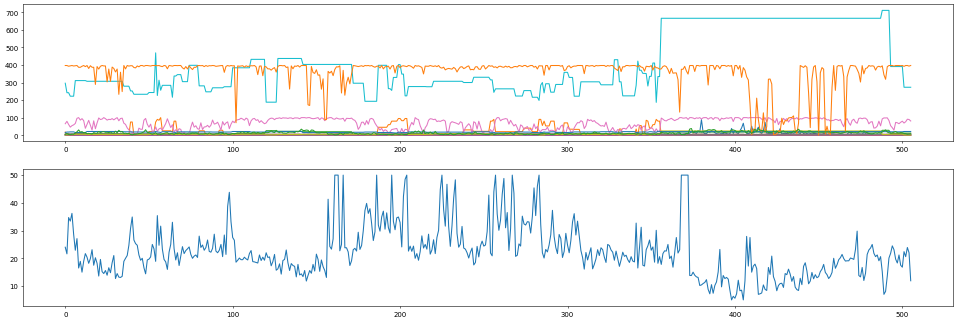

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8), dpi=50)
plt.subplot(211)
plt.plot(X)
plt.subplot(212)
plt.plot(y)

In [4]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
# 目的変数(PRICE)をデータフレームに結合
df['PRICE'] = np.array(boston.target)
# ボストンデータセットの変数の説明の表示
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df['PRICE'] = pd.DataFrame(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


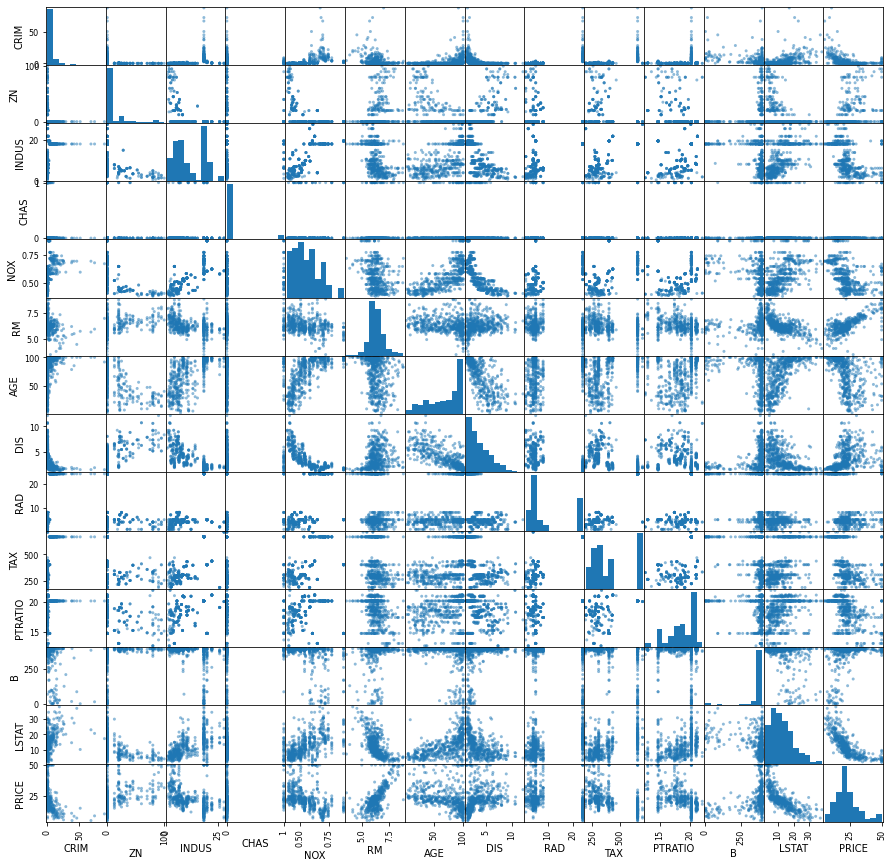

In [7]:
# pandasのscatter_matrix関数を使いペアプロットを表示
from pandas.plotting import scatter_matrix
fig = pd.plotting.scatter_matrix(df, figsize=(15,15))

対角線成分はヒストグラム

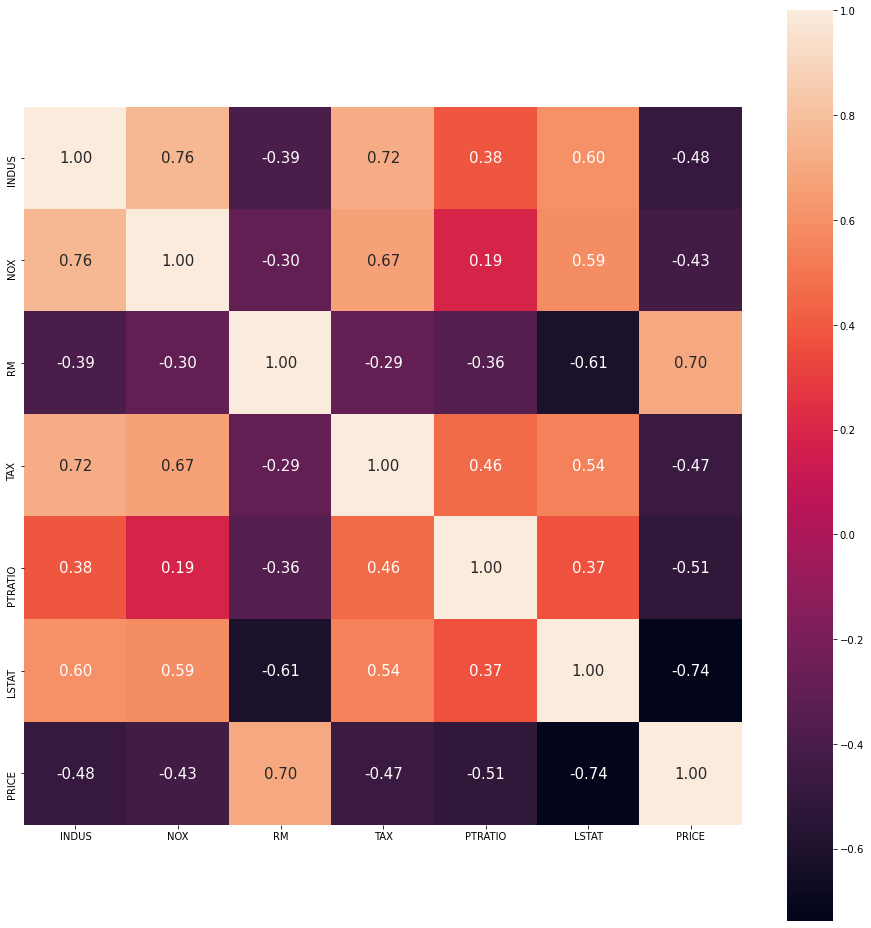

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['INDUS','NOX','RM','TAX','PTRATIO','LSTAT','PRICE']
df['PRICE'] = pd.DataFrame(boston.target)
plt.figure(figsize=(13, 13))
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                cbar= True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols
                )
              
            
plt.tight_layout()
plt.show()